#Part 2(a) Naive Bayes Classification

##Import the libraries

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
import time

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

##Read the dataset

In [19]:
dataset = load_wine()
x = pd.DataFrame(dataset.data, columns = ["Alcohol",	"Malic acid",	"Ash",	"Alcalinity of ash",	"Magnesium",	"Total phenols",	"Flavanoids",	"Nonflavanoid phenols",	"Proanthocyanins",	"Color intensity",	"Hue",	"OD280/OD315 of diluted wines", "Proline"])
y = pd.DataFrame(dataset.target, columns = ["Target"])

In [20]:
x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


##Train Test split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

##Applying the Guassian Naive Bayes

In [22]:
model = GaussianNB()
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Accuracies of the model


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.83      1.00      0.91         5

    accuracy                           0.97        36
   macro avg       0.94      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36


Confusion Matrix:

[[13  0  0]
 [ 0 17  1]
 [ 0  0  5]]

Accuracy Score:

0.9722222222222222
\Confusion Matrix Display:



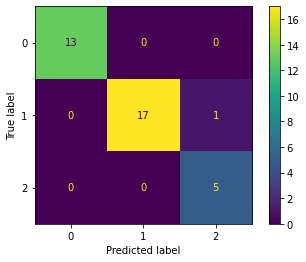

In [23]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_predict))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test, y_predict)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test, y_predict))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

##Plot the decision boundaries

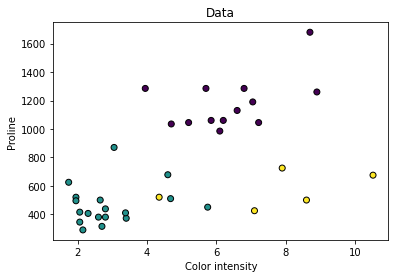

In [26]:
plt.scatter(x_test.loc[:,"Color intensity"],x_test.loc[:,"Proline"], c=y_test.to_numpy(), edgecolors='k',alpha=1)
plt.title('Data')
plt.xlabel('Color intensity')
plt.ylabel('Proline')
plt.show()

##Selecting the most important two features

In [24]:
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(x_train, y_train)
X_kbest_features

array([[5.100000e+00, 8.450000e+02],
       [3.800000e+00, 6.300000e+02],
       [3.300000e+00, 4.880000e+02],
       [2.800000e+00, 6.800000e+02],
       [5.580000e+00, 5.700000e+02],
       [5.050000e+00, 1.295000e+03],
       [5.600000e+00, 7.800000e+02],
       [4.320000e+00, 7.350000e+02],
       [5.600000e+00, 1.265000e+03],
       [5.100000e+00, 7.600000e+02],
       [2.080000e+00, 3.650000e+02],
       [6.000000e+00, 4.650000e+02],
       [3.800000e+00, 1.035000e+03],
       [5.000000e+00, 6.000000e+02],
       [2.200000e+00, 6.300000e+02],
       [2.450000e+00, 5.620000e+02],
       [5.880000e+00, 6.800000e+02],
       [4.920000e+00, 5.900000e+02],
       [3.740000e+00, 4.720000e+02],
       [6.300000e+00, 1.375000e+03],
       [3.520000e+00, 8.450000e+02],
       [5.250000e+00, 1.290000e+03],
       [2.950000e+00, 3.550000e+02],
       [3.000000e+00, 4.660000e+02],
       [3.050000e+00, 4.950000e+02],
       [2.900000e+00, 3.850000e+02],
       [1.080000e+01, 4.800000e+02],
 

In [25]:
x_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0
107,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0
88,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0


###So the most important features are "Color intensity" and "Proline"

##To apply the 2d decision boundary with the model we need to train it on the two features only.

In [27]:
x_train2 = x_train.loc[:,["Color intensity","Proline"]]
x_test2 = x_test.loc[:,["Color intensity","Proline"]]

In [28]:
model2 = GaussianNB()
model2 = model2.fit(x_train2, y_train)
y_predict2 = model2.predict(x_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


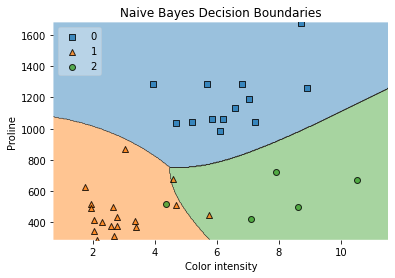

In [29]:
plot_decision_regions(x_test2.to_numpy(), y_test.to_numpy().ravel(), clf=model2, legend=2)

plt.title('Naive Bayes Decision Boundaries')
plt.xlabel('Color intensity')
plt.ylabel('Proline')
plt.show()

#Part 2(b) KNN Model

##Import the libraries

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn import metrics
import time
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

!pip install fast_ml
from fast_ml.model_development import train_valid_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 643 kB/s 


##Read car-evaluation-dataset 

In [ ]:
car=pd.read_csv(r"car_evaluation.csv",names=['price', 'maint', 'doors', 'ppl', 'lug_boot', 'safety', 'acceptable'])

In [ ]:
car.head()

,price,maint,doors,ppl,lug_boot,safety,acceptable
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Encoding categorical data

###Encode features

####First feature

In [ ]:
car['price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
category_price=['low', 'med', 'high','vhigh']
or_prince=OrdinalEncoder(categories=[category_price])
car[['price']] =or_prince.fit_transform(car[['price']])
car.head()

,price,maint,doors,ppl,lug_boot,safety,acceptable
0,3.0,vhigh,2,2,small,low,unacc
1,3.0,vhigh,2,2,small,med,unacc
2,3.0,vhigh,2,2,small,high,unacc
3,3.0,vhigh,2,2,med,low,unacc
4,3.0,vhigh,2,2,med,med,unacc


####Second feature

In [ ]:
car['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
category_doors=['2', '3', '4', '5more']
or_doors=OrdinalEncoder(categories=[category_doors])
car[['doors']] =or_doors.fit_transform(car[['doors']])
car.head()

,price,maint,doors,ppl,lug_boot,safety,acceptable
0,3.0,vhigh,0.0,2,small,low,unacc
1,3.0,vhigh,0.0,2,small,med,unacc
2,3.0,vhigh,0.0,2,small,high,unacc
3,3.0,vhigh,0.0,2,med,low,unacc
4,3.0,vhigh,0.0,2,med,med,unacc


####Third feature

In [ ]:
car['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
category_maint=['low', 'med', 'high','vhigh']
or_maint=OrdinalEncoder(categories=[category_maint])
car[['maint']] =or_maint.fit_transform(car[['maint']])
car.head()

,price,maint,doors,ppl,lug_boot,safety,acceptable
0,3.0,3.0,0.0,2,small,low,unacc
1,3.0,3.0,0.0,2,small,med,unacc
2,3.0,3.0,0.0,2,small,high,unacc
3,3.0,3.0,0.0,2,med,low,unacc
4,3.0,3.0,0.0,2,med,med,unacc


####Fourth feature

In [ ]:
car['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [ ]:
category_lug_boot=['small', 'med', 'big']
or_lug_boot=OrdinalEncoder(categories=[category_lug_boot])
car[['lug_boot']] =or_lug_boot.fit_transform(car[['lug_boot']])
car.head()


,price,maint,doors,ppl,lug_boot,safety,acceptable
0,3.0,3.0,0.0,2,0.0,low,unacc
1,3.0,3.0,0.0,2,0.0,med,unacc
2,3.0,3.0,0.0,2,0.0,high,unacc
3,3.0,3.0,0.0,2,1.0,low,unacc
4,3.0,3.0,0.0,2,1.0,med,unacc


####Fifth feature

In [ ]:
car['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [ ]:
category_safety=['low','med', 'high']
or_safety=OrdinalEncoder(categories=[category_safety])
car[['safety']] =or_safety.fit_transform(car[['safety']])
car.head()

,price,maint,doors,ppl,lug_boot,safety,acceptable
0,3.0,3.0,0.0,2,0.0,0.0,unacc
1,3.0,3.0,0.0,2,0.0,1.0,unacc
2,3.0,3.0,0.0,2,0.0,2.0,unacc
3,3.0,3.0,0.0,2,1.0,0.0,unacc
4,3.0,3.0,0.0,2,1.0,1.0,unacc


####Sixth feature

In [ ]:
car['ppl'].unique()

array(['2', '4', 'more'], dtype=object)

In [ ]:
category_ppl=['2', '4', 'more']
or_ppl=OrdinalEncoder(categories=[category_ppl])
car[['ppl']] =or_ppl.fit_transform(car[['ppl']])
car.head()

,price,maint,doors,ppl,lug_boot,safety,acceptable
0,3.0,3.0,0.0,0.0,0.0,0.0,unacc
1,3.0,3.0,0.0,0.0,0.0,1.0,unacc
2,3.0,3.0,0.0,0.0,0.0,2.0,unacc
3,3.0,3.0,0.0,0.0,1.0,0.0,unacc
4,3.0,3.0,0.0,0.0,1.0,1.0,unacc


###Encode target variables

In [ ]:
en=LabelEncoder()
car['acceptable']=en.fit_transform(car['acceptable'])
car.head()

,price,maint,doors,ppl,lug_boot,safety,acceptable
0,3.0,3.0,0.0,0.0,0.0,0.0,2
1,3.0,3.0,0.0,0.0,0.0,1.0,2
2,3.0,3.0,0.0,0.0,0.0,2.0,2
3,3.0,3.0,0.0,0.0,1.0,0.0,2
4,3.0,3.0,0.0,0.0,1.0,1.0,2


##Dividing the train,validation and test data

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(
    car,
    target = 'acceptable',
    train_size=1000/1728,
    valid_size=300/1728,
    test_size=428/1728,
    random_state=42)

In [ ]:
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(1000, 6) (300, 6) (428, 6)
(1000,) (300,) (428,)


##10 KNN Models

In [ ]:
testing_accuracy=[]
validation_accuracy=[]

for i in range(1,11):
    x_train_1 = X_train.iloc[:int(i*0.1*1000.0),:]
    y_train_1 = y_train[:int(i*0.1*1000.0)]
    
    # K value set to be 2 
    classifer = KNeighborsClassifier(n_neighbors=2 ,p=1)
    
    # model training
    classifer.fit(x_train_1,y_train_1)
    
    # testing the model
    y_pred_test= classifer.predict(X_test)
    y_pred_validation= classifer.predict(X_valid)
    
    #Accuracy
    Accuracy_test=metrics.accuracy_score(y_test, y_pred_test)
    Accuracy_valid=metrics.accuracy_score(y_valid, y_pred_validation)
    testing_accuracy.append(Accuracy_test)
    validation_accuracy.append(Accuracy_valid)
    
validation_accuracy = (' '.join('{:.2f}'.format(f) for f in validation_accuracy))
testing_accuracy = (' '.join('{:.2f}'.format(f) for f in testing_accuracy))

validation_accuracy = list(map(float, validation_accuracy.split())) 
testing_accuracy = list(map(float, testing_accuracy.split()))  

In [ ]:
print(validation_accuracy)
print(testing_accuracy)

[0.75, 0.77, 0.81, 0.82, 0.79, 0.81, 0.8, 0.82, 0.81, 0.82]
[0.69, 0.76, 0.78, 0.79, 0.79, 0.82, 0.81, 0.8, 0.81, 0.82]


##Validation vs Testing accuracies plot

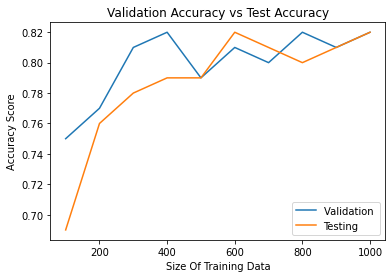

In [ ]:
plt.figure()
plt.plot(range(100,1001,100), validation_accuracy, label='Validation ')
plt.plot(range(100,1001,100), testing_accuracy, label='Testing ')
plt.title('Validation Accuracy vs Test Accuracy')
plt.xlabel('Size Of Training Data')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

##Determining the best k from 1 to 10 by calculating error

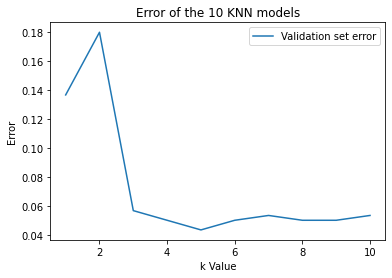

In [ ]:
# Importing the numpy modlule
import numpy as np

# creating sets for errors
error1= []

# for loop 
for k in range(1,11):
    # using KNN algorithm
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_valid)

    # stroring the errors
    error1.append(np.mean(y_valid!= y_pred1))

# ploting the graphs for testing and training 
plt.plot(range(1,11), error1, label="Validation set error")
plt.title('Error of the 10 KNN models')
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()


##Determining the best k from 1 to 10 by calculating accuracy

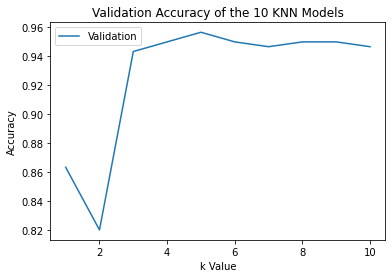

In [ ]:
# Importing the numpy modlule
import numpy as np

# creating sets for errors
accuracy=[]

# for loop 
for k in range(1,11):
    # using KNN algorithm
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_valid)
    Accuracy_test=metrics.accuracy_score(y_valid, y_pred1)
    accuracy.append(Accuracy_test)



# ploting the graphs for testing and training 
plt.plot(range(1,11), accuracy, label="Validation")
plt.title('Validation Accuracy of the 10 KNN Models')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.legend()


##Analysis the training time

In [ ]:
klist=[2,10]
training_time=[]
prediction_time = []

for i in range(len(klist)):
      # set K value
      print(klist[i])
      clf = KNeighborsClassifier(n_neighbors=klist[i])
      #10% of the train data
      x_tr=X_train.iloc[:100,:]
      y_tr= y_train[0:100]

      start = time.time()
      clf = clf.fit(x_tr,y_tr)
      stop = time.time()
      ttime = stop - start
      training_time.append(ttime)

      start1 = time.time()  
      y_pred= clf.predict(X_test)
      stop1 = time.time()
      ptime = stop1 - start1
      prediction_time.append(ptime)
      print("Accuracy of the test of 10% and k = {}:".format(klist[i]), accuracy_score(y_test, y_pred))

      #100% of the data
      clf1 = KNeighborsClassifier(n_neighbors=klist[i])
      x_tr=X_train
      y_tr= y_train
      
      start = time.time()
      clf1 = clf1.fit(x_tr,y_tr)
      stop = time.time()
      ttime = stop - start
      training_time.append(ttime)

      start = time.time()  
      y_pred= clf1.predict(X_test)
      stop = time.time()
      ptime = stop - start
      prediction_time.append(ptime)

      print("Accuracy of the test of 100% and k = {}: ".format(klist[i]), accuracy_score(y_test, y_pred))

2
Accuracy of the test of 10% and k = 2: 0.6565420560747663
Accuracy of the test of 100% and k = 2:  0.822429906542056
10
Accuracy of the test of 10% and k = 10: 0.75
Accuracy of the test of 100% and k = 10:  0.9228971962616822


In [ ]:
print(training_time)
print(prediction_time)

[0.0017571449279785156, 0.002576589584350586, 0.0016086101531982422, 0.0022115707397460938]
[0.012192487716674805, 0.014163494110107422, 0.012578725814819336, 0.018758535385131836]


##Training time bar chart

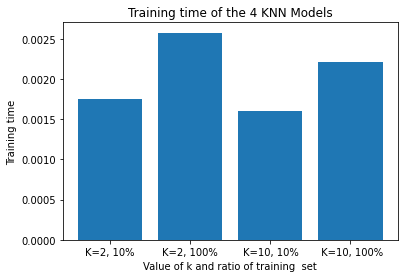

In [ ]:
x = ['K=2, 10%','K=2, 100%','K=10, 10%', ' K=10, 100%']

plt.bar(x,training_time)
plt.title('Training time of the 4 KNN Models')
plt.xlabel('Value of k and ratio of training  set')
plt.ylabel('Training time')
plt.show()

##Prediction time bar chart

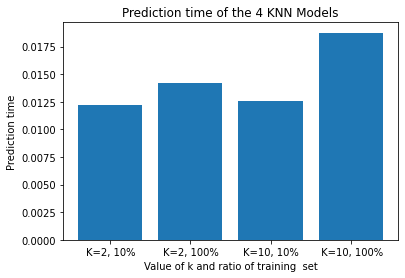

In [ ]:
x = ['K=2, 10%','K=2, 100%','K=10, 10%', ' K=10, 100%']

plt.bar(x,prediction_time)
plt.title('Prediction time of the 4 KNN Models')
plt.xlabel('Value of k and ratio of training  set')
plt.ylabel('Prediction time')
plt.show()